# **DATATHON OF DSC DATA 101 BOOTCAMP**


# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import random as random
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, r2_score 
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, plot_precision_recall_curve

#Reading dataset

In [ ]:
path = '/content/drive/MyDrive/Data 101 DSC/Datathon/competition data/train.csv'
data = pd.read_csv(path)
data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,21388,6,10452,DX1 DX4,23,19.199662,YES,RURAL,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1990,10,5807,DX1 DX5,65,18.354031,YES,URBAN,Stable,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0
2,16710,43,11802,DX6,2,24.732770,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,29293,32,6863,DX2 DX3,57,22.204759,NO,URBAN,Stable,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1
4,24007,14,1495,DX6,66,23.883381,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


# Creating a copy of the dataset

In [ ]:
df = data.copy()

#Working on dataset

In [ ]:
df.index

RangeIndex(start=0, stop=18477, step=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18477 entries, 0 to 18476
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  18477 non-null  int64  
 1   Diagnosed_Condition        18477 non-null  int64  
 2   Patient_ID                 18477 non-null  int64  
 3   Treated_with_drugs         18469 non-null  object 
 4   Patient_Age                18477 non-null  int64  
 5   Patient_Body_Mass_Index    18477 non-null  float64
 6   Patient_Smoker             18477 non-null  object 
 7   Patient_Rural_Urban        18477 non-null  object 
 8   Patient_mental_condition   18477 non-null  object 
 9   A                          17472 non-null  float64
 10  B                          17472 non-null  float64
 11  C                          17472 non-null  float64
 12  D                          17472 non-null  float64
 13  E                          17472 non-null  flo

In [ ]:
df.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,18477.000000,18477.000000,18477.000000,18477.000000,18477.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,18477.000000
mean,16569.901607,26.494777,6265.680955,33.192672,23.449486,0.899038,0.136905,0.186584,0.082647,0.391083,0.053743,0.000458,1.750458,0.632245
std,9524.860124,15.018378,3596.100029,19.555623,3.805675,0.301286,0.343757,0.389589,0.275355,0.488007,0.225517,0.021394,0.769756,0.482207
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8317.000000,13.000000,3195.000000,16.000000,20.197874,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16647.000000,27.000000,6244.000000,33.000000,23.379967,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,40.000000,9355.000000,50.000000,26.783642,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [ ]:
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Survived_1_year                int64
dtype: object

In [ ]:
df.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Survived_1_year'],
      dtype='object')

In [ ]:
df['Survived_1_year']

0        1
1        0
2        0
3        1
4        0
        ..
18472    1
18473    1
18474    1
18475    0
18476    1
Name: Survived_1_year, Length: 18477, dtype: int64

In [ ]:
print('Total number of patients in the training data...', len(df))
print('Number of patients in the training data who survived after 1 year...', len(df[df['Survived_1_year'] == 1]))

Total number of patients in the training data... 18477
Number of patients in the training data who survived after 1 year... 11682


In [ ]:
df.corr()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
ID_Patient_Care_Situation,1.000000,-0.007047,0.001487,-0.002722,-0.005299,0.003126,0.004440,0.011085,-0.015961,0.003765,0.012322,0.036950,0.010131,-0.000916
Diagnosed_Condition,-0.007047,1.000000,0.009990,-0.012688,0.007777,0.005699,0.002179,-0.007493,-0.008106,0.007992,0.008509,-0.037732,0.003022,-0.002220
Patient_ID,0.001487,0.009990,1.000000,0.012879,-0.023049,-0.008124,-0.009202,-0.003841,0.002262,-0.005317,0.004969,0.037120,-0.009307,-0.005893
Patient_Age,-0.002722,-0.012688,0.012879,1.000000,-0.004951,-0.032522,-0.013075,-0.007685,0.009823,-0.002241,0.012044,0.100841,-0.014033,-0.079212
Patient_Body_Mass_Index,-0.005299,0.007777,-0.023049,-0.004951,1.000000,0.013424,0.000973,-0.010716,-0.015339,-0.005791,-0.017294,-0.123166,-0.017384,-0.122488
A,0.003126,0.005699,-0.008124,-0.032522,0.013424,1.000000,-0.061068,-0.084296,-0.078799,-0.165500,-0.051553,-0.063868,0.171480,-0.048642
B,0.004440,0.002179,-0.009202,-0.013075,0.000973,-0.061068,1.000000,-0.028767,-0.007069,-0.016197,-0.022559,-0.008524,0.388473,-0.047078
C,0.011085,-0.007493,-0.003841,-0.007685,-0.010716,-0.084296,-0.028767,1.000000,0.009909,-0.024064,0.005080,-0.010251,0.449771,-0.034185
D,-0.015961,-0.008106,0.002262,0.009823,-0.015339,-0.078799,-0.007069,0.009909,1.000000,-0.014791,-0.010697,-0.006424,0.316044,-0.106973
E,0.003765,0.007992,-0.005317,-0.002241,-0.005791,-0.165500,-0.016197,-0.024064,-0.014791,1.000000,-0.005839,-0.017153,0.542308,0.017978


#Cleaning and pre-processing the dataset

In [ ]:
df['A'].fillna((data['A'].mean()), inplace=True)
df['B'].fillna((data['B'].mean()), inplace=True)
df['C'].fillna((data['C'].mean()), inplace=True)
df['D'].fillna((data['D'].mean()), inplace=True)
df['E'].fillna((data['E'].mean()), inplace=True)
df['F'].fillna((data['F'].mean()), inplace=True)
df['Z'].fillna((data['Z'].mean()), inplace=True)
df['Number_of_prev_cond'].fillna((data['Number_of_prev_cond'].mean()), inplace=True)
df['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum(axis =0)

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
df['Patient_Smoker'] = data['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
df['Patient_Rural_Urban'] = data['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)
df['Patient_mental_condition'] = data['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

#Plotting graphs

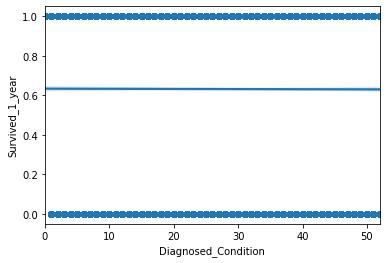

In [ ]:
#Column 2 
sns.regplot(x="Diagnosed_Condition", y="Survived_1_year", data=df)

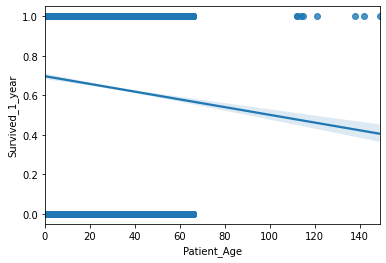

In [ ]:
#Column 5
sns.regplot(x='Patient_Age', y='Survived_1_year',data = df)

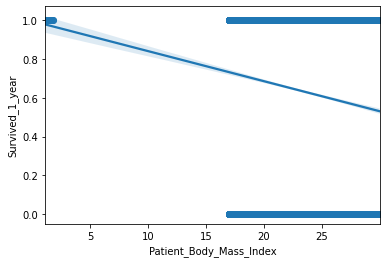

In [ ]:
#Column 6
sns.regplot(x='Patient_Body_Mass_Index',y='Survived_1_year',data=df)

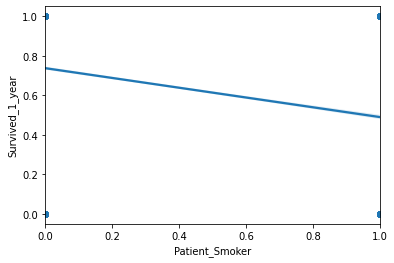

In [ ]:
#Column 7
sns.regplot(x='Patient_Smoker',y='Survived_1_year',data=df)

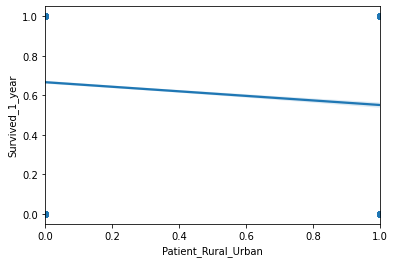

In [ ]:
#Column 8
sns.regplot(x='Patient_Rural_Urban',y='Survived_1_year',data=df)

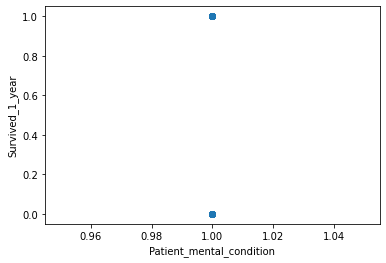

In [ ]:
#Column 9
sns.regplot(x='Patient_mental_condition',y='Survived_1_year',data=df)

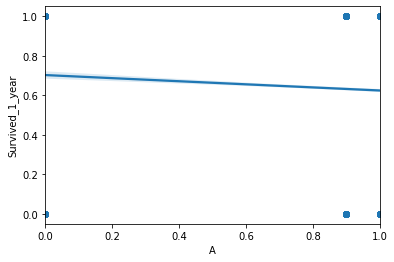

In [ ]:
#Column 10
sns.regplot(x='A',y='Survived_1_year',data=df)

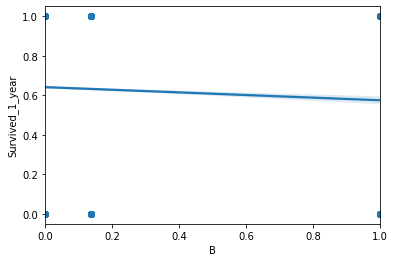

In [ ]:
#Column 11
sns.regplot(x='B',y='Survived_1_year',data=df)

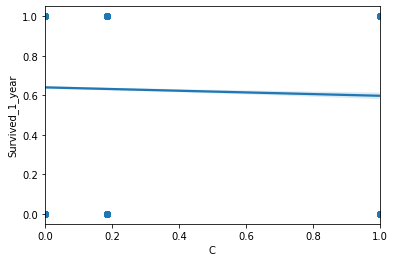

In [ ]:
#Column 12
sns.regplot(x='C',y='Survived_1_year',data=df)

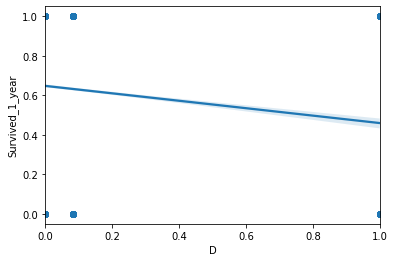

In [ ]:
#Column 13
sns.regplot(x='D',y='Survived_1_year',data=df)

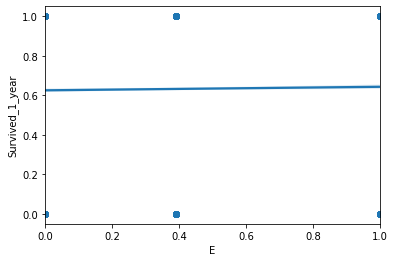

In [ ]:
#Column 14
sns.regplot(x='E',y='Survived_1_year',data=df)

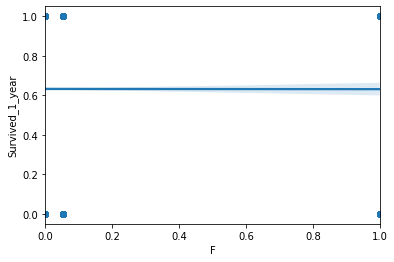

In [ ]:
#Column 15
sns.regplot(x='F',y='Survived_1_year',data=df)

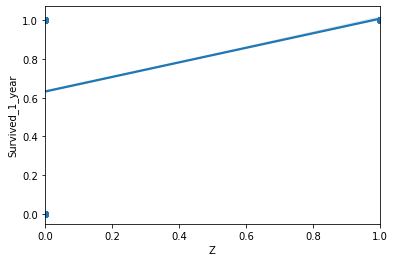

In [ ]:
#Column 16
sns.regplot(x='Z',y='Survived_1_year',data=df)

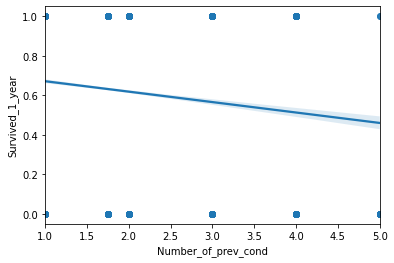

In [ ]:
#column 17
sns.regplot(x='Number_of_prev_cond',y='Survived_1_year',data=df)

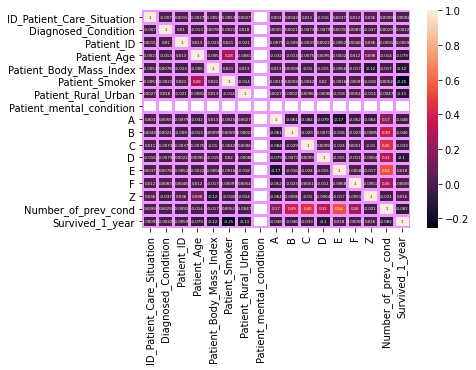

In [ ]:
#Cor relation heat map
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 4}, linewidths=2, linecolor="#eb99ff",)

# Preparation for modelling

In [ ]:
# Omitting irrelevant columns
final_df = df[['Survived_1_year', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker','Number_of_prev_cond']]
final_df.head()

,Survived_1_year,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond
0,1,23,19.199662,1,1.0
1,0,65,18.354031,1,2.0
2,0,2,24.732770,0,1.0
3,1,57,22.204759,0,3.0
4,0,66,23.883381,1,1.0


#Variables for Modelling

In [ ]:
#Seperating independent and dependant attributes
Independent = final_df.drop("Survived_1_year",axis =1)
Dependent   = final_df["Survived_1_year"]

In [ ]:
Independent.shape

(18477, 4)

In [ ]:
Dependent.shape

(18477,)

In [ ]:
#Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.30,)

In [ ]:
print("The shape of training data is : ", X_train.shape)
print("The shape of class variable in  training data is : ", y_train.shape)
print("The shape of test data is : ", X_test.shape)
print("The shape of class variable in testing data is : ", y_test.shape)

The shape of training data is :  (12933, 4)
The shape of class variable in  training data is :  (12933,)
The shape of test data is :  (5544, 4)
The shape of class variable in testing data is :  (5544,)


In [ ]:
X_train.head()

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond
1943,57,26.594208,0,1.0
2139,51,17.884884,0,1.0
8404,43,19.600602,1,1.0
3610,10,28.101188,0,1.0
10968,3,19.615304,0,3.0


In [ ]:
y_train.head()

1943     1
2139     1
8404     1
3610     0
10968    0
Name: Survived_1_year, dtype: int64

In [ ]:
X_test.head()

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond
1553,39,18.115035,0,2.000000
461,54,26.133708,0,3.000000
11266,15,22.963977,0,1.000000
1178,66,22.469144,1,1.000000
5214,40,26.788780,1,1.750458


In [ ]:
y_test.head()

1553     0
461      1
11266    1
1178     0
5214     1
Name: Survived_1_year, dtype: int64

#Decision tree modelling

In [ ]:
treemodel = tree.DecisionTreeClassifier()
treemodel = treemodel.fit(X = X_train,y = y_train)

In [ ]:
predictions = treemodel.predict(X_test)

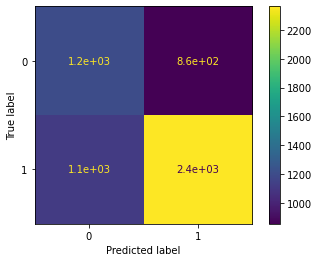

In [ ]:
#confusion matrix decision tree
confusion_matrix(y_test, predictions)
plot_confusion_matrix(treemodel, X_test, y_test) 

In [ ]:
#Classification report decision tree
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.52      0.58      0.55      2064
           1       0.73      0.68      0.71      3480

    accuracy                           0.64      5544
   macro avg       0.63      0.63      0.63      5544
weighted avg       0.65      0.64      0.65      5544



#Naive-Bayes Modelling

In [ ]:
nbmodel = GaussianNB()

In [ ]:
predictions = nbmodel.fit(X_train, y_train).predict(X_test)

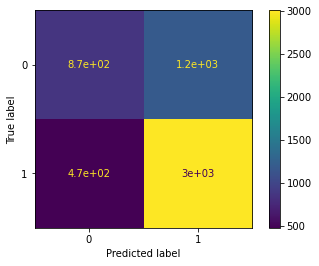

In [ ]:
#confusion matrix naive bayes
plot_confusion_matrix(nbmodel, X_test, y_test)

In [ ]:
#classification report naive bayes
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.42      0.51      2064
           1       0.72      0.86      0.78      3480

    accuracy                           0.70      5544
   macro avg       0.68      0.64      0.65      5544
weighted avg       0.69      0.70      0.68      5544



#Nearest Neighbour Modelling

In [ ]:
nmodel = KNeighborsClassifier(n_neighbors=5)

In [ ]:
predictions = nmodel.fit(X_train, y_train).predict(X_test)

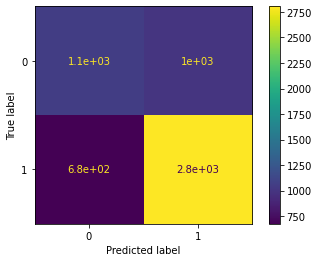

In [ ]:
#confusion matrix nearest neighbour
plot_confusion_matrix(nmodel, X_test, y_test)

In [ ]:
#classification report nearest neighbour
print(classification_report(y_test, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.61      0.51      0.56      2064
           1       0.74      0.81      0.77      3480

    accuracy                           0.70      5544
   macro avg       0.67      0.66      0.66      5544
weighted avg       0.69      0.70      0.69      5544



In [ ]:
#neighbour number 5 proves to be best as it gives accuracy 0.69 and for 4 it is 0.64 and for 6 it is 0.68 

>># **Predicting Survival for given test.csv**

#Reading test data

In [ ]:
path_test = '/content/drive/MyDrive/Data 101 DSC/Datathon/competition data/test.csv'
data_test = pd.read_csv(path_test)
data_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,9913,2,10247,DX6,7,23.489639,NO,RURAL,Stable,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0
1,20681,40,10919,DX6,66,21.941882,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2264,18,5283,DX3,3,24.579787,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21587,40,7442,DX1 DX4,9,17.832771,NO,URBAN,Stable,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
4,15876,46,3845,DX1 DX3,64,28.829848,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


#Copying test data

In [ ]:
df_test = data_test.copy()

#Cleaning

In [ ]:
df_test.isnull().sum(axis =0)

ID_Patient_Care_Situation      0
Diagnosed_Condition            0
Patient_ID                     0
Treated_with_drugs             5
Patient_Age                    0
Patient_Body_Mass_Index        0
Patient_Smoker                 0
Patient_Rural_Urban            0
Patient_mental_condition       0
A                            230
B                            230
C                            230
D                            230
E                            230
F                            230
Z                            230
Number_of_prev_cond          230
dtype: int64

In [ ]:
df_test['A'].fillna((data['A'].mean()), inplace=True)
df_test['B'].fillna((data['B'].mean()), inplace=True)
df_test['C'].fillna((data['C'].mean()), inplace=True)
df_test['D'].fillna((data['D'].mean()), inplace=True)
df_test['E'].fillna((data['E'].mean()), inplace=True)
df_test['F'].fillna((data['F'].mean()), inplace=True)
df_test['Z'].fillna((data['Z'].mean()), inplace=True)
df_test['Number_of_prev_cond'].fillna((data['Number_of_prev_cond'].mean()), inplace=True)
df_test['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace=True)

In [ ]:
df_test.isnull().sum(axis =0)

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [ ]:
df_test['Patient_Smoker'] = data['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
df_test['Patient_Rural_Urban'] = data['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)
df_test['Patient_mental_condition'] = data['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

#Omitting irrelevant columns

In [ ]:
final_df_test = df_test[['Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker','Number_of_prev_cond']]
final_df_test.head()

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Number_of_prev_cond
0,7,23.489639,1,4.0
1,66,21.941882,1,2.0
2,3,24.579787,0,1.0
3,9,17.832771,0,3.0
4,64,28.829848,1,2.0


#Reading sample submission file

In [ ]:
sample_submission_data_path = '/content/drive/MyDrive/Data 101 DSC/Datathon/competition data/sampleSubmission.csv' 
data_sample_submission = pd.read_csv(sample_submission_data_path)

In [ ]:
data_sample_submission.head()

,ID_Patient_Care_Situation,Survived_1_year
0,9913,0
1,20681,1
2,2264,0
3,21587,1
4,15876,0


#Omitting irrelevant columns

In [ ]:
data_to_be_predicted = data_sample_submission.drop('ID_Patient_Care_Situation',axis =1,)
data_to_be_predicted.head()

,Survived_1_year
0,0
1,1
2,0
3,1
4,0


#Modelling

After hit and trial, i found that tree model works the best and gives me the best results relatively

In [ ]:
treetestmodel = tree.DecisionTreeClassifier()
treetestmodel = treemodel.fit(X = X_train,y = y_train)
predictions = treetestmodel.predict(final_df_test)

In [ ]:
print(classification_report(data_to_be_predicted, predictions, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.39      0.43      2310
           1       0.49      0.60      0.54      2310

    accuracy                           0.49      4620
   macro avg       0.49      0.49      0.49      4620
weighted avg       0.49      0.49      0.49      4620



In [ ]:
print(predictions)

[1 0 1 ... 0 1 1]


#Making Prediction DataFrame

In [ ]:
predictions_dataframe = pd.DataFrame(predictions)
predictions_dataframe.head()

,0
0,1
1,0
2,1
3,1
4,0


In [ ]:
predictions_dataframe.value_counts()

1    2803
0    1817
dtype: int64

#Making Submission DataFrame

In [ ]:
df_submission = pd.DataFrame(columns=["ID_Patient_Care_Situation","Survived_1_year"])

In [ ]:
df_submission["ID_Patient_Care_Situation"] = data_sample_submission.ID_Patient_Care_Situation

In [ ]:
df_submission["Survived_1_year"] = predictions

In [ ]:
df_submission

,ID_Patient_Care_Situation,Survived_1_year
0,9913,1
1,20681,0
2,2264,1
3,21587,1
4,15876,0
...,...,...
4615,18001,1
4616,24900,1
4617,10998,0
4618,25628,1


# Exporting

In [ ]:
#df_submission.to_csv('/content/drive/MyDrive/Data 101 DSC/Datathon/submission.csv', index=False)



 >># **Making a bettter model for better prediction**





# Copying Data

In [ ]:
df_balance = df.copy()

In [ ]:
df_balance.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,21388,6,10452,DX1 DX4,23,19.199662,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,1990,10,5807,DX1 DX5,65,18.354031,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0
2,16710,43,11802,DX6,2,24.732770,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,29293,32,6863,DX2 DX3,57,22.204759,0,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1
4,24007,14,1495,DX6,66,23.883381,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [ ]:
df_balance.shape

(18477, 18)

# Cleaning Data

In [ ]:
df_balance.isnull().sum(axis = 0)

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

In [ ]:
#no null values in the data

# Making Dummies

Use One hot encoding

In [ ]:
#Making Dummie Binary Variables to make multiple non numerical values into different numerical columns
df_balance = pd.get_dummies(df_balance,'Treated_with_drugs')
df_balance.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,21388,6,10452,23,19.199662,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1990,10,5807,65,18.354031,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16710,43,11802,2,24.732770,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,29293,32,6863,57,22.204759,0,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24007,14,1495,66,23.883381,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Omitting Irrelevant Columns

In [ ]:
df_balance.columns

Index(['ID_Patient_Care_Situation', 'Diagnosed_Condition', 'Patient_ID',
       'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker',
       'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C', 'D',
       'E', 'F', 'Z', 'Number_of_prev_cond', 'Survived_1_year',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'T

In [ ]:
#Dropping Irrelevant columns
df_balance = df_balance.drop(columns=['ID_Patient_Care_Situation', 'Patient_ID'])
df_balance.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,6,23,19.199662,1,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,65,18.354031,1,1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,2,24.732770,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,32,57,22.204759,0,1,1,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,14,66,23.883381,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Splitting Data

In [ ]:
Independent = df_balance.drop("Survived_1_year",axis =1)
Dependent   = df_balance["Survived_1_year"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.01,)

# Balancing 

Using Over-Sampling

In [ ]:
df.Survived_1_year.value_counts()

1    11682
0     6795
Name: Survived_1_year, dtype: int64

In [ ]:
from sklearn.utils import resample

In [ ]:
train_data = pd.concat([X_train, y_train], axis = 1)

In [ ]:
survived_no = train_data[train_data.Survived_1_year==0]
survived_yes = train_data[train_data.Survived_1_year==1]

In [ ]:
survival_upsampled = resample(survived_no, replace = True, n_samples = len(survived_yes),)

In [ ]:
upsampled = pd.concat([survived_yes, survival_upsampled])

In [ ]:
upsampled.Survived_1_year.value_counts()

1    11559
0    11559
Name: Survived_1_year, dtype: int64

# Defining Variables After Balancing

In [ ]:
Independent = upsampled.drop("Survived_1_year",axis =1)
Dependent   = upsampled["Survived_1_year"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Independent, Dependent, test_size=0.01,)

# Modelling on selected data

In [ ]:
treemodel_balance = tree.DecisionTreeClassifier()
treemodel_balance = treemodel_balance.fit(X = X_train,y = y_train)

In [ ]:
predictions = treemodel_balance.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions, labels=[0,1]))

# Preparation for Modelling for the problem data

Firstly Managing the Given Data to match the training data

In [ ]:
df_test = data_test.copy()

Cleaning

In [ ]:
df_test['A'].fillna((data['A'].mean()), inplace=True)
df_test['B'].fillna((data['B'].mean()), inplace=True)
df_test['C'].fillna((data['C'].mean()), inplace=True)
df_test['D'].fillna((data['D'].mean()), inplace=True)
df_test['E'].fillna((data['E'].mean()), inplace=True)
df_test['F'].fillna((data['F'].mean()), inplace=True)
df_test['Z'].fillna((data['Z'].mean()), inplace=True)
df_test['Number_of_prev_cond'].fillna((data['Number_of_prev_cond'].mean()), inplace=True)
df_test['Treated_with_drugs'].fillna(df['Treated_with_drugs'].mode()[0], inplace=True)

In [ ]:
df_test['Patient_Smoker'] = data['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)
df_test['Patient_Rural_Urban'] = data['Patient_Rural_Urban'].apply(lambda x: 1 if x == 'URBAN' else 0)
df_test['Patient_mental_condition'] = data['Patient_mental_condition'].apply(lambda x: 1 if x == 'Stable' else 0)

In [ ]:
df_test.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,9913,2,10247,DX6,7,23.489639,1,0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0
1,20681,40,10919,DX6,66,21.941882,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2264,18,5283,DX3,3,24.579787,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21587,40,7442,DX1 DX4,9,17.832771,0,1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
4,15876,46,3845,DX1 DX3,64,28.829848,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


Finalizing test data

In [ ]:
final_df_test = df_test.drop(columns= ['ID_Patient_Care_Situation', 'Patient_ID'])
final_df_test.head()

,Diagnosed_Condition,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,2,DX6,7,23.489639,1,0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0
1,40,DX6,66,21.941882,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,18,DX3,3,24.579787,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40,DX1 DX4,9,17.832771,0,1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0
4,46,DX1 DX3,64,28.829848,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


Since I one hot encoded the drugs column so doing same with this data

In [ ]:
final_df_test= pd.get_dummies(final_df_test,'Treated_with_drugs')

In [ ]:
final_df_test.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6
0,2,7,23.489639,1,0,1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,40,66,21.941882,1,1,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,18,3,24.579787,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,40,9,17.832771,0,1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,64,28.829848,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now it is time to manage the submission file given

In [ ]:
data_to_be_predicted = data_sample_submission.drop('ID_Patient_Care_Situation',axis =1,)
data_to_be_predicted.head()

,Survived_1_year
0,0
1,1
2,0
3,1
4,0


# Final Modelling

Using Decision tree again for the final modelling

In [ ]:
X_train = (X_train.drop('Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',axis =1))
X_train.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 '

In [ ]:
final_df_test.columns

Index(['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index',
       'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition',
       'A', 'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 '

Using Decision Tree

In [ ]:
final_model = tree.DecisionTreeClassifier()
final_model = final_model.fit(X = X_train,y = y_train)

In [ ]:
predictions_tree_model = final_model.predict(final_df_test)

In [ ]:
print(classification_report(data_to_be_predicted, predictions_tree_model, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.32      0.39      2310
           1       0.50      0.67      0.57      2310

    accuracy                           0.50      4620
   macro avg       0.50      0.50      0.48      4620
weighted avg       0.50      0.50      0.48      4620



Using Gaussian Naive Bayes Modelling

In [ ]:
model_g_nb = GaussianNB()
predictions_bayes = model_g_nb.fit(X_train, y_train).predict(final_df_test)
print(classification_report(data_to_be_predicted, predictions_bayes, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.50      0.83      0.62      2310
           1       0.50      0.17      0.25      2310

    accuracy                           0.50      4620
   macro avg       0.50      0.50      0.44      4620
weighted avg       0.50      0.50      0.44      4620



Using Nearest Neighbour Modelling

In [ ]:
model_k_n = KNeighborsClassifier(n_neighbors=5)
predictions_nearest = model_k_n.fit(X_train, y_train).predict(final_df_test)
print(classification_report(data_to_be_predicted, predictions_nearest, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      2310
           1       0.49      0.54      0.52      2310

    accuracy                           0.49      4620
   macro avg       0.49      0.49      0.49      4620
weighted avg       0.49      0.49      0.49      4620



Using Logistic Regression

In [ ]:
model_log_reg = LogisticRegression()
predictions_logreg = model_log_reg.fit(X_train,y_train).predict(final_df_test)
print(classification_report(data_to_be_predicted, predictions_logreg, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      2310
           1       0.49      0.54      0.52      2310

    accuracy                           0.49      4620
   macro avg       0.49      0.49      0.49      4620
weighted avg       0.49      0.49      0.49      4620



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Making Final Prediction Dataframe

Prediction of Decision Tree

In [ ]:
predictions_tree_model

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
predictions_dataframe_tree = pd.DataFrame(predictions_tree_model)
predictions_dataframe_tree

,0
0,1
1,0
2,1
3,1
4,0
...,...
4615,1
4616,0
4617,0
4618,1


In [ ]:
predictions_dataframe_tree.value_counts()

1    3105
0    1515
dtype: int64

Prediction of Naive-Bayes

In [ ]:
predictions_dataframe_nb = pd.DataFrame(predictions_bayes)
predictions_dataframe_nb

,0
0,0
1,0
2,0
3,1
4,1
...,...
4615,0
4616,0
4617,0
4618,0


In [ ]:
predictions_dataframe_nb.value_counts()

0    3831
1     789
dtype: int64

Prediction of Nearest Neighbour

In [ ]:
predictions_dataframe_knn = pd.DataFrame(predictions_nearest)
predictions_dataframe_knn

,0
0,1
1,0
2,1
3,1
4,0
...,...
4615,0
4616,0
4617,1
4618,1


In [ ]:
predictions_dataframe_knn.value_counts()

1    2559
0    2061
dtype: int64

# Making Final Submission Dataframe

From Decision Tree

In [ ]:
df_submission_tree = pd.DataFrame(columns=["ID_Patient_Care_Situation","Survived_1_year"])

In [ ]:
df_submission_tree["ID_Patient_Care_Situation"] = data_sample_submission.ID_Patient_Care_Situation

In [ ]:
df_submission_tree["Survived_1_year"] = predictions_tree_model

In [ ]:
df_submission_tree

,ID_Patient_Care_Situation,Survived_1_year
0,9913,1
1,20681,0
2,2264,1
3,21587,1
4,15876,0
...,...,...
4615,18001,1
4616,24900,0
4617,10998,0
4618,25628,1


From Naive Bayes

In [ ]:
df_submission_bayes = pd.DataFrame(columns=["ID_Patient_Care_Situation","Survived_1_year"])

In [ ]:
df_submission_bayes["ID_Patient_Care_Situation"] = data_sample_submission.ID_Patient_Care_Situation

In [ ]:
df_submission_bayes["Survived_1_year"] = predictions_bayes

In [ ]:
df_submission_bayes

,ID_Patient_Care_Situation,Survived_1_year
0,9913,0
1,20681,0
2,2264,0
3,21587,1
4,15876,1
...,...,...
4615,18001,0
4616,24900,0
4617,10998,0
4618,25628,0


From Nearest Neighbour

In [ ]:
df_submission_knn = pd.DataFrame(columns=["ID_Patient_Care_Situation","Survived_1_year"])

In [ ]:
df_submission_knn["ID_Patient_Care_Situation"] = data_sample_submission.ID_Patient_Care_Situation

In [ ]:
df_submission_knn["Survived_1_year"] = predictions_nearest

In [ ]:
df_submission_knn

,ID_Patient_Care_Situation,Survived_1_year
0,9913,1
1,20681,0
2,2264,1
3,21587,1
4,15876,0
...,...,...
4615,18001,0
4616,24900,0
4617,10998,1
4618,25628,1


# Exporting Final DataFrame

In [ ]:
#df_submission.to_csv('/content/drive/MyDrive/Data 101 DSC/Datathon/better_submission.csv', index=False)

In [ ]:
#df_submission_tree.to_csv('/content/drive/MyDrive/Data 101 DSC/Datathon/better_tree_submission.csv', index=False)

In [ ]:
#df_submission_bayes.to_csv('/content/drive/MyDrive/Data 101 DSC/Datathon/better_bayes_submission.csv', index=False)

In [ ]:
#df_submission_knn.to_csv('/content/drive/MyDrive/Data 101 DSC/Datathon/better_knn_submission.csv', index=False)